<a href="https://colab.research.google.com/github/peterlhn/Google-Colab/blob/master/ML_RED_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Wine Quality with Several Classification Techniques**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

[Kaggle Dataset - Red Wine Quality
](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

[Predicting Wine Quality with Several Classification Techniques](https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434#ad59)

##**Introduction**
As the quarantine continues, I’ve picked up a number of hobbies and interests… including WINE. Recently, I’ve acquired a taste for wines, although I don’t really know what makes a good wine. Therefore, I decided to apply some machine learning models to figure out what makes a good quality wine!

For this project, I used Kaggle’s Red Wine Quality dataset to build various classification models to predict whether a particular red wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7). The quality of a wine is determined by 11 input variables:

**Objectives**

The objectives of this project are as follows

1.   To experiment with different classification methods to see which yields the highest accuracy
2.   To determine which features are the most indicative of a good quality wine


##**Understanding the Dataset**

In [ ]:
url = 'https://storage.googleapis.com/ppp-personal-project/Machine-Learning-Dataset-and-Code/Wine_Quality/winequality-red.csv'

df = pd.read_csv(url)

# See the number of rows and columns
print("Rows, columns: " + str(df.shape))
print("------------------------------")
# See the first five rows of the dataset
print(df.head())

Rows, columns: (1599, 12)
------------------------------
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


**Missing Value**

In [ ]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


##**Exploring Variables**


**Histogram of ‘quality’ variable**

First, I wanted to see the distribution of the quality variable. I wanted to make sure that I had enough ‘good quality’ wines in my dataset — you’ll see later how I defined ‘good quality’.

In [ ]:
fig = px.histogram(df,x='quality')
fig.show()

**Correlation Matrix**

I wanted to see the correlations between the variables that I’m working with. This allows me to get a much better understanding of the **relationships between my variables** in a quick glimpse.

Immediately, I can see that there are some variables that are strongly correlated to quality. It’s likely that these variables are also the most important features in our machine learning model, but we’ll take a look at that later.


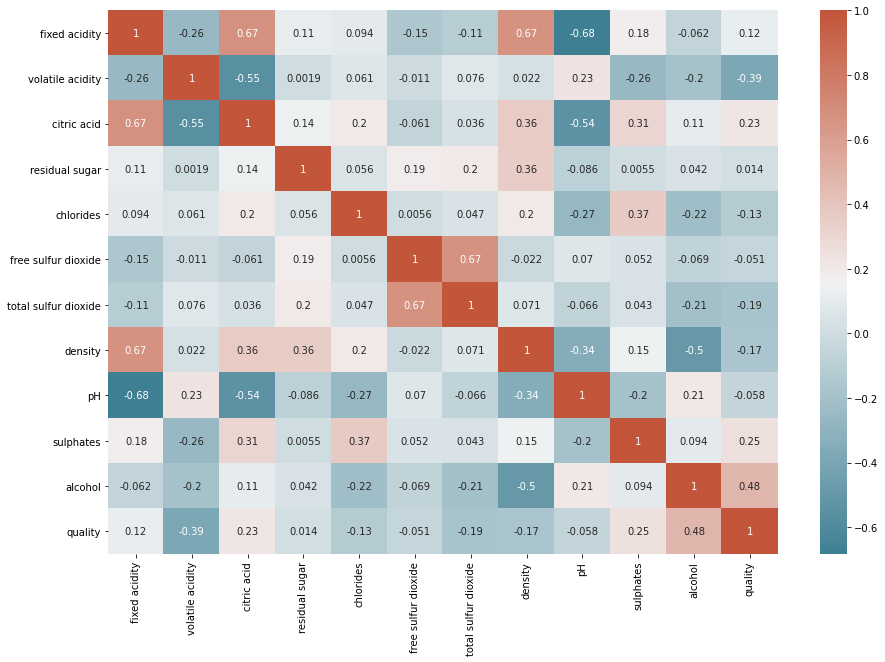

In [ ]:
corr = df.corr()
# Setup an empty plot to show the result
plt.pyplot.subplots(figsize=(15,10))

# Using a heatmap (From seaborm) to show the corrleation 
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


##**Convert to a Classification Problem**

I wanted to compare the effectiveness of **different classification techniques**, so I needed to change the output variable to a binary output.

For this problem, I defined a bottle of wine as
*   ‘good quality’ if it had a quality score of 7 or higher
*   ‘bad quality’ if it had a score of less than 7



Once I converted the output variable to a binary output, I separated my feature variables (X) and the target variable (y) into separate dataframes.

In [ ]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

**Proportion of Good vs Bad Wines**





To make sure that there was a reasonable number of good quality wines. Based on the results below, it seemed like a fair enough number. 

In some applications, resampling may be required if the data was extremely imbalanced, but I assumed that it was okay for this purpose.

In [ ]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

##**Preparing Data for Modelling**

**Standardizing Feature Variables**

At this point, I felt that I was ready to prepare the data for modelling. The first thing that I did was standardize the data. Standardizing the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1. 

It’s important to standardize your data in order to equalize the range of the data.


For example, imagine a dataset with two input features: height in millimeters and weight in pounds. **Because the values of ‘height’ are much higher due to its measurement, a greater emphasis will automatically be placed on height than weight, creating a bias.**

In [ ]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

**Split data**

Next I split the data into a training and test set so that I could cross-validate my models and determine their effectiveness.

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

##**Modelling**
For this project, I wanted to compare five different machine learning models: 
* decision trees
* random forests
* AdaBoost
* Gradient Boost, and 
* XGBoost. 

For the purpose of this project, I wanted to compare these models by their accuracy.

**Model 1: Decision Tree**


Decision trees are a popular model, used in operations research, strategic planning, and machine learning. 

Each square above is called a node, and the more nodes you have, the more accurate your decision tree will be (generally). The last nodes of the decision tree, where a decision is made, are called the leaves of the tree. 

Decision trees are intuitive and easy to build but fall short when it comes to accuracy.

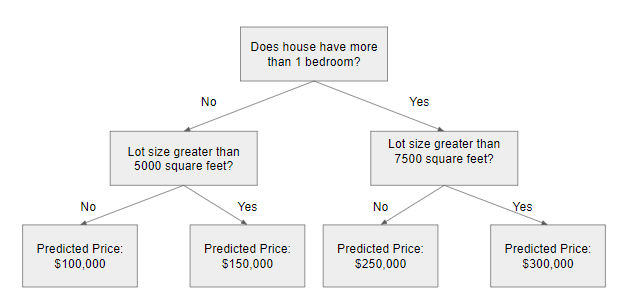

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



**Model 2: Random Forest**

Random forests are an ensemble learning technique that builds off of decision trees. 

Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. 

By relying on a “majority wins” model, it reduces the risk of error from an individual tree.

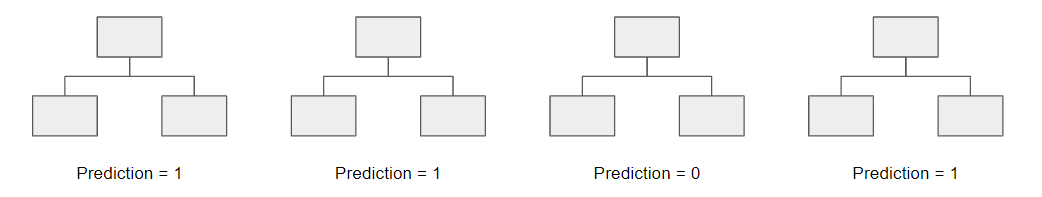

For example, if we created one decision tree, the third one, it would predict 0. But if we relied on the mode of all 4 decision trees, the predicted value would be 1. This is the power of random forests.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



**Model 3: AdaBoost**

The next three models are boosting algorithms that take weak learners and turn them into strong ones. 

*   [AdaBoost](https://www.youtube.com/watch?v=LsK-xG1cLYA&ab_channel=StatQuestwithJoshStarmer)
*   [Gradient Boost](https://www.youtube.com/watch?v=3CC4N4z3GJc)
*  [XGBoost](https://www.youtube.com/watch?v=OtD8wVaFm6E)



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



**Model 4: Gradient Boosting**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.52      0.51      0.52        45

    accuracy                           0.89       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.89      0.89      0.89       400



**Model 5: XGBoost**


In [ ]:
import xgboost as xgb

model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       355
           1       0.57      0.56      0.56        45

    accuracy                           0.90       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.90      0.90      0.90       400



By comparing the five models, the random forest and XGBoost seems to yield the highest level of accuracy. However, since XGBoost has a better f1-score for predicting good quality wines (1), I’m concluding that the XGBoost is the winner of the five models.

##**Feature Importance**
Below, I graphed the feature importance based on the Random Forest model and the XGBoost model. While they slightly vary, the top 3 features are the same: **alcohol, volatile acidity, and sulphates**. 

If you look below the graphs, I split the dataset into good quality and bad quality to compare these variables in more detail.

**via Random Forest**

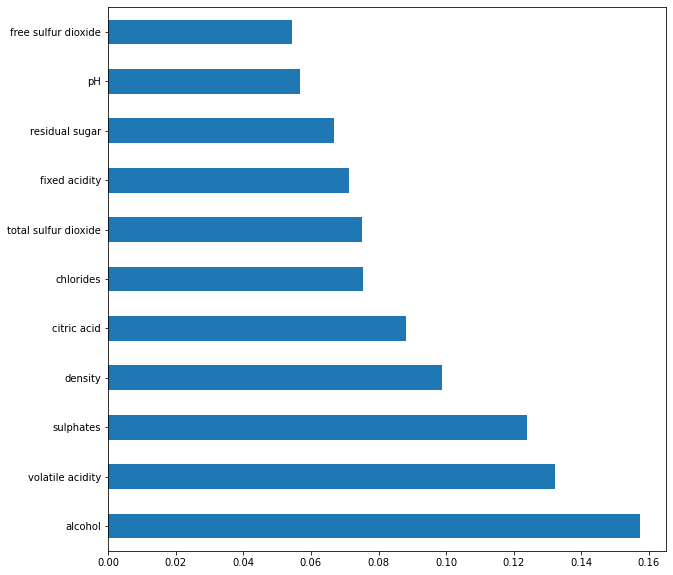

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

**via XGBoost**

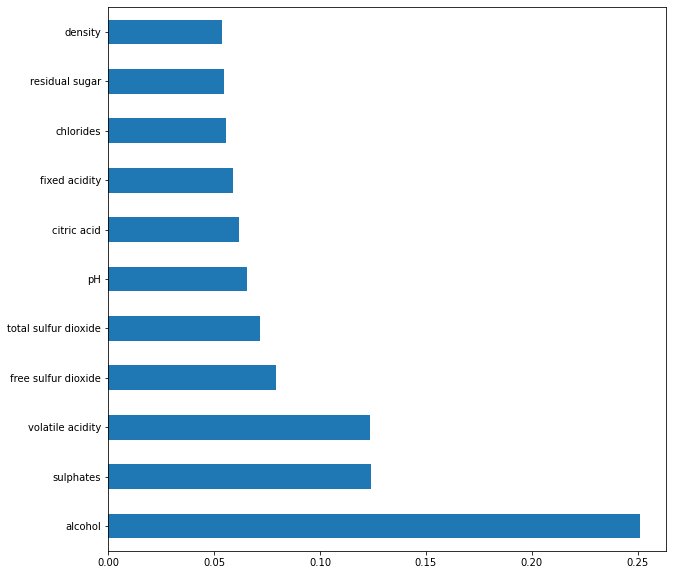

In [ ]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

**Comparing the Top 4 Features**

By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

In [ ]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0
